In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
credit = pd.read_csv(r"C:\Users/Tony/Desktop/Big Data/05/01/default of credit card clients.csv",header =1)

In [ ]:
credit.head()

In [ ]:
credit.columns

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [37]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

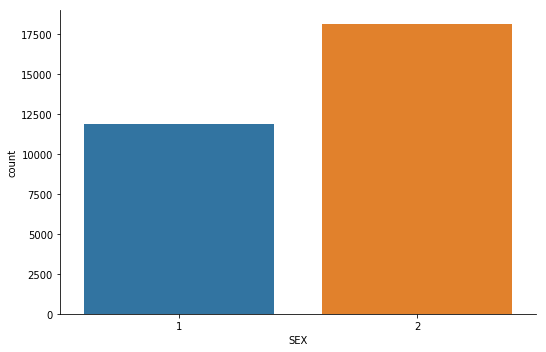

In [41]:
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

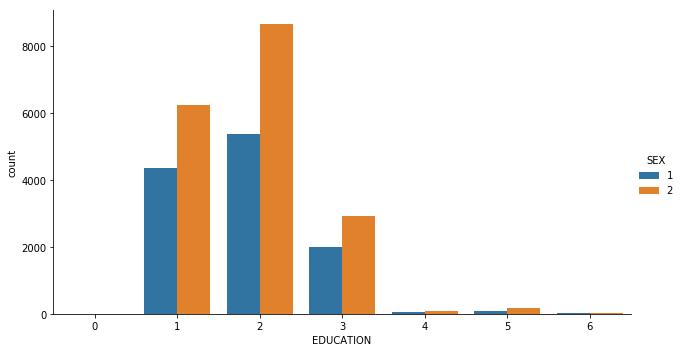

In [40]:
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)


In [42]:
pagos = ['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [43]:
dfpagos = pd.DataFrame(pagos)

In [44]:
table = pd.crosstab(index=[credit.EDUCATION,credit.MARRIAGE], columns=[credit.SEX,])



In [45]:
table.unstack()

SEX           1                           2                      
MARRIAGE      0       1       2     3     0       1       2     3
EDUCATION                                                        
0           NaN     2.0     6.0   NaN   NaN     2.0     4.0   NaN
1           1.0  1690.0  2633.0  30.0   3.0  2032.0  4176.0  20.0
2           1.0  2370.0  2940.0  63.0   5.0  4472.0  4080.0  99.0
3          12.0  1048.0   894.0  36.0  32.0  1813.0  1015.0  67.0
4           NaN    18.0    23.0   1.0   NaN    34.0    45.0   2.0
5           NaN    48.0    46.0   1.0   NaN   102.0    81.0   2.0
6           NaN    14.0    11.0   0.0   NaN    14.0    10.0   2.0

In [46]:
table.columns, table.index

(Int64Index([1, 2], dtype='int64', name='SEX'), MultiIndex([(0, 1),
             (0, 2),
             (1, 0),
             (1, 1),
             (1, 2),
             (1, 3),
             (2, 0),
             (2, 1),
             (2, 2),
             (2, 3),
             (3, 0),
             (3, 1),
             (3, 2),
             (3, 3),
             (4, 1),
             (4, 2),
             (4, 3),
             (5, 1),
             (5, 2),
             (5, 3),
             (6, 1),
             (6, 2),
             (6, 3)],
            names=['EDUCATION', 'MARRIAGE']))

In [47]:
print('Average and median age are %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median()))



Average and median age are 35 and 34 years old, respectively


In [48]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [49]:
age = credit['AGE'].dropna()

Text(0.5, 1.0, "Distribucion de clientes' edad")

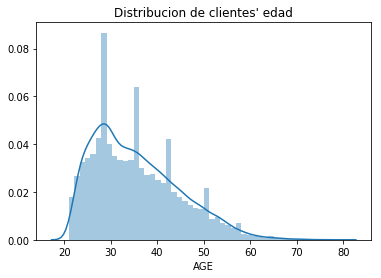

In [50]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribucion de clientes' edad")

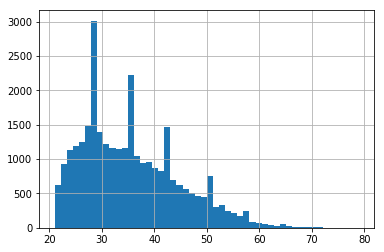

In [51]:
credit['AGE'].hist(bins=50)

In [52]:
def Age_Splitting(passenger):
    AGE, SEX = passenger
    
    if (AGE > 16 and AGE < 30):
        return 'Young Adult'
    if AGE > 30 and AGE < 55:
        return 'Adult'
    else:
        return 'Old'

In [53]:
credit[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


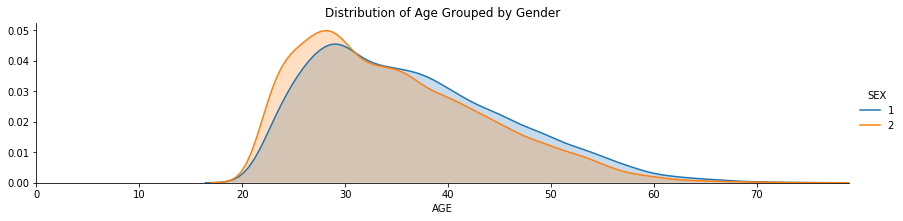

In [54]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

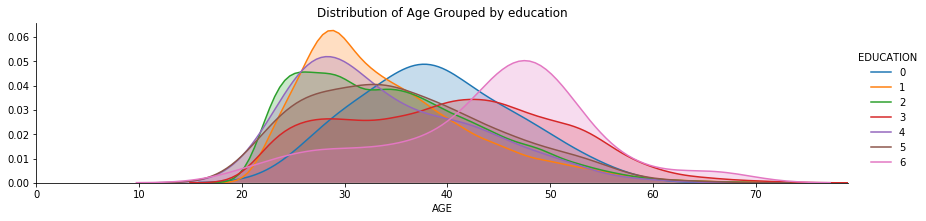

In [55]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by education')
fig.add_legend()


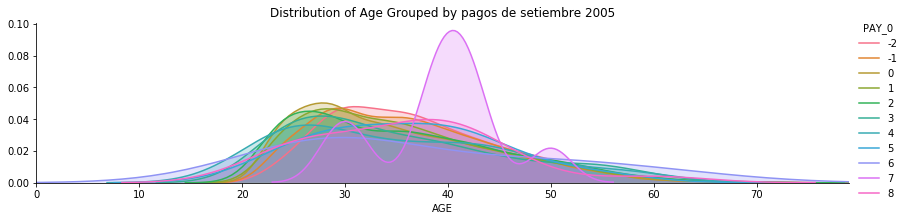

In [56]:
fig = sns.FacetGrid(credit, hue='PAY_0', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by pagos de setiembre 2005')
fig.add_legend()

In [57]:


from collections import Counter

In [58]:
pagosset2005 = credit['PAY_0'].dropna()
pagosset2005.head()


0    2
1   -1
2    0
3    0
4   -1
Name: PAY_0, dtype: int64

In [59]:
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)

True

In [60]:
pagoanteriorset2005 = pd.DataFrame((credit['PAY_0']).groupby(credit['SEX']).count())

In [61]:
pagoanteriorset2005.head()

,PAY_0
SEX,
1,11888
2,18112


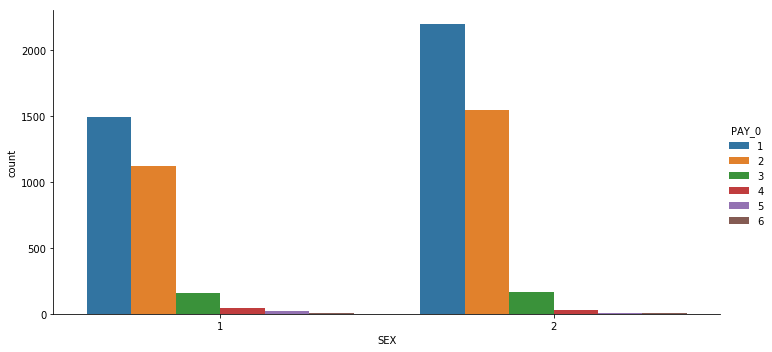

In [62]:
sns.catplot('SEX', data=credit, kind='count', hue='PAY_0' ,
               hue_order=range(1,7), aspect=2)



In [63]:
pagoset = pd.crosstab(index=[credit.SEX], columns=[credit.PAY_0])
pagoset

PAY_0,-2,-1,0,1,2,3,4,5,6,7,8
SEX,,,,,,,,,,,
1,871,2132,6031,1492,1120,159,44,18,6,5,10
2,1888,3554,8706,2196,1547,163,32,8,5,4,9


In [64]:
pagoagosto = pd.crosstab(index=[credit.SEX], columns=[credit.PAY_2])
pagoagosto

PAY_2,-2,-1,0,1,2,3,4,5,6,7,8
SEX,,,,,,,,,,,
1,1229,2220,6467,14,1710,156,60,14,7,11,0
2,2553,3830,9263,14,2217,170,39,11,5,9,1


In [65]:
pagojulio = pd.crosstab(index=[credit.SEX], columns=[credit.PAY_3])
pagojulio

PAY_3,-2,-1,0,1,2,3,4,5,6,7,8
SEX,,,,,,,,,,,
1,1352,2204,6468,4,1654,128,40,10,12,13,3
2,2733,3734,9296,0,2165,112,36,11,11,14,0


In [66]:
pagojunio = pd.crosstab(index=[credit.SEX], columns=[credit.PAY_4])
pagojunio

PAY_4,-2,-1,0,1,2,3,4,5,6,7,8
SEX,,,,,,,,,,,
1,1510,2091,6730,2,1361,103,38,18,2,31,2
2,2838,3596,9725,0,1798,77,31,17,3,27,0


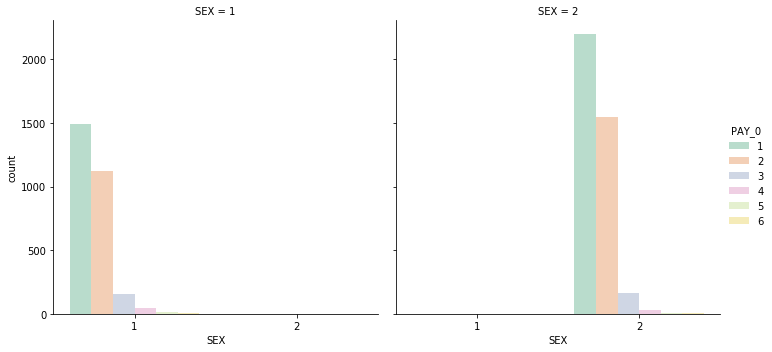

In [67]:
sns.catplot('SEX', data=credit, hue='PAY_0', kind='count', palette='Pastel2', hue_order=range(1,7),
              col='SEX')

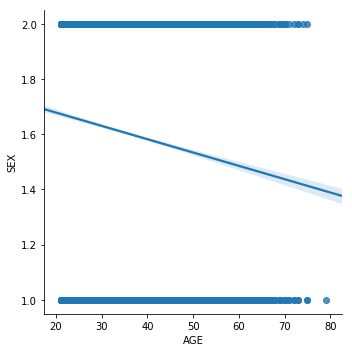

In [68]:
sns.lmplot('AGE', 'SEX', data=credit)

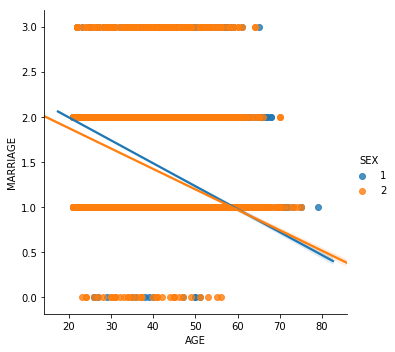

In [71]:
sns.lmplot('AGE', 'MARRIAGE', data=credit, hue='SEX')

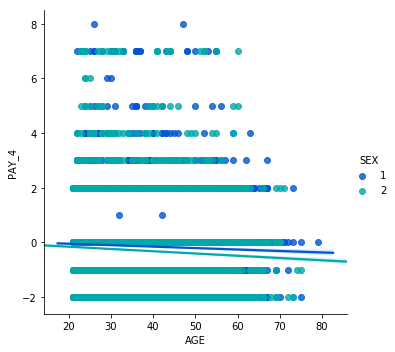

In [74]:
sns.lmplot('AGE', 'PAY_4', hue='SEX', data=credit, palette='winter', hue_order=range(1,3))

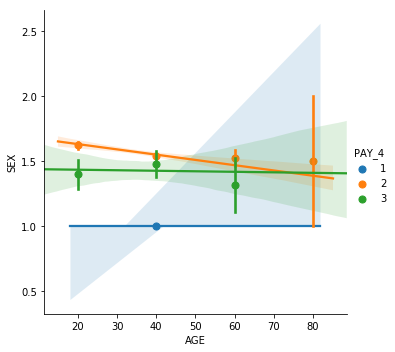

In [78]:
generations = [10,20,40,60,80]
sns.lmplot('AGE','SEX',hue='PAY_4',data=credit,x_bins=generations, hue_order=[1,2,3])

In [79]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [81]:
sexo = credit['SEX'].dropna()
sexo.head()

0    2
1    2
2    2
3    2
4    1
Name: SEX, dtype: int64

In [86]:
pagoanteriorset2005media =  pd.DataFrame((credit['PAY_0']).groupby(credit['SEX']).mean())


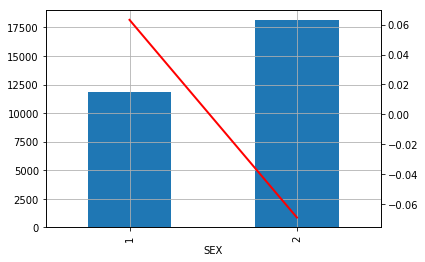

In [87]:

fig = plt.figure()
ax = pagoanteriorset2005['PAY_0'].plot(kind='bar',grid=True)
ax2 = ax.twinx()
ax2.plot(pagoanteriorset2005media['PAY_0'].values, linestyle='-', linewidth=2.0,color='red')
plt.show();

In [88]:
corr = credit.corr()

In [89]:
print(corr)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [90]:
corr.style.background_gradient(cmap='coolwarm')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1,0.0261792,0.0184975,0.0391767,-0.0290794,0.0186777,-0.0305749,-0.0112149,-0.0184936,-0.00273489,-0.0221992,-0.0202701,0.0193887,0.0179819,0.0243541,0.0403506,0.0167053,0.0167296,0.00974244,0.00840612,0.0391505,0.00779313,0.000652188,0.00299978,-0.013952
LIMIT_BAL,0.0261792,1,0.0247552,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.26746,-0.249411,-0.235195,0.28543,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.15352
SEX,0.0184975,0.0247552,1,0.0142319,-0.0313888,-0.0908736,-0.0576429,-0.070771,-0.0660961,-0.0601732,-0.0550639,-0.0440078,-0.0336419,-0.0311835,-0.0245633,-0.0218797,-0.0170052,-0.0167331,-0.000242455,-0.00139091,-0.00859662,-0.00222897,-0.00166716,-0.00276602,-0.0399606
EDUCATION,0.0391767,-0.219161,0.0142319,1,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.0975202,0.082316,0.0235812,0.0187488,0.0130024,-0.000451345,-0.0075665,-0.00909895,-0.0374562,-0.0300382,-0.0399431,-0.0382182,-0.0403585,-0.0371999,0.0280061
MARRIAGE,-0.0290794,-0.108139,-0.0313888,-0.143464,1,-0.41417,0.0199172,0.0241991,0.0326877,0.0331215,0.0356292,0.0343448,-0.0234718,-0.0216018,-0.0249095,-0.0233438,-0.0253934,-0.0212068,-0.005979,-0.0080927,-0.00354135,-0.0126593,-0.00120476,-0.00664094,-0.0243392
AGE,0.0186777,0.144713,-0.0908736,0.175061,-0.41417,1,-0.0394474,-0.0501478,-0.0530484,-0.0497217,-0.053826,-0.0487734,0.0562385,0.0542831,0.0537097,0.0513531,0.049345,0.0476127,0.0261467,0.0217849,0.0292474,0.021379,0.02285,0.0194782,0.0138898
PAY_0,-0.0305749,-0.271214,-0.0576429,0.105364,0.0199172,-0.0394474,1,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.17698,-0.0792687,-0.0701005,-0.0705608,-0.0640049,-0.0581899,-0.0586732,0.324794
PAY_2,-0.0112149,-0.296382,-0.070771,0.121566,0.0241991,-0.0501478,0.672164,1,0.766552,0.662067,0.62278,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.0807007,-0.05899,-0.0559012,-0.0468584,-0.0370931,-0.0365004,0.263551
PAY_3,-0.0184936,-0.286123,-0.0660961,0.114025,0.0326877,-0.0530484,0.574245,0.766552,1,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.00129481,-0.0667934,-0.0533108,-0.0460665,-0.0358631,-0.0358611,0.235253
PAY_4,-0.00273489,-0.26746,-0.0601732,0.108793,0.0331215,-0.0497217,0.538841,0.662067,0.777359,1,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.00936214,-0.00194366,-0.0692352,-0.0434614,-0.0335895,-0.0265651,0.216614


In [91]:
corr.style.background_gradient(cmap='viridis').set_precision(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1,0.026,0.018,0.039,-0.029,0.019,-0.031,-0.011,-0.018,-0.0027,-0.022,-0.02,0.019,0.018,0.024,0.04,0.017,0.017,0.0097,0.0084,0.039,0.0078,0.00065,0.003,-0.014
LIMIT_BAL,0.026,1,0.025,-0.22,-0.11,0.14,-0.27,-0.3,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.3,0.29,0.2,0.18,0.21,0.2,0.22,0.22,-0.15
SEX,0.018,0.025,1,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.04
EDUCATION,0.039,-0.22,0.014,1,-0.14,0.18,0.11,0.12,0.11,0.11,0.098,0.082,0.024,0.019,0.013,-0.00045,-0.0076,-0.0091,-0.037,-0.03,-0.04,-0.038,-0.04,-0.037,0.028
MARRIAGE,-0.029,-0.11,-0.031,-0.14,1,-0.41,0.02,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.0081,-0.0035,-0.013,-0.0012,-0.0066,-0.024
AGE,0.019,0.14,-0.091,0.18,-0.41,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.031,-0.27,-0.058,0.11,0.02,-0.039,1,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.32
PAY_2,-0.011,-0.3,-0.071,0.12,0.024,-0.05,0.67,1,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.26
PAY_3,-0.018,-0.29,-0.066,0.11,0.033,-0.053,0.57,0.77,1,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24
PAY_4,-0.0027,-0.27,-0.06,0.11,0.033,-0.05,0.54,0.66,0.78,1,0.82,0.72,0.2,0.23,0.24,0.25,0.24,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.22


In [92]:
import sklearn